<a href="https://colab.research.google.com/github/LR2023O/DATA-SCIENCE/blob/main/CAT3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


===== DATA PREVIEW =====
Shape of the dataset:  (9, 12)
+----+--------------+-------------------+-------------------+-----------------+-------------------+------------------------+----------------------+--------------------+-----------+-----------------------+----------------+-------------------------------+
|    | student_id   |   enrollment_year |   attendance_rate |   average_grade |   failed_subjects |   socioeconomic_status |   distance_to_school |   parental_support |   outcome |   enrolled_in_program |   need_support | previous_school_type_PUBLIC   |
|----+--------------+-------------------+-------------------+-----------------+-------------------+------------------------+----------------------+--------------------+-----------+-----------------------+----------------+-------------------------------|
|  0 | BSCIT001     |              2023 |                90 |              85 |                 1 |                      2 |                  2   |                  3 |         1 | 

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

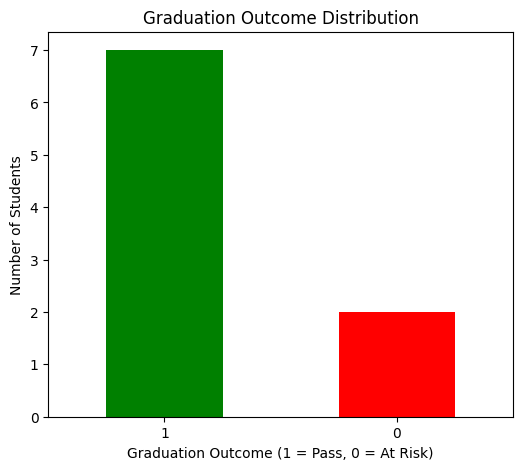

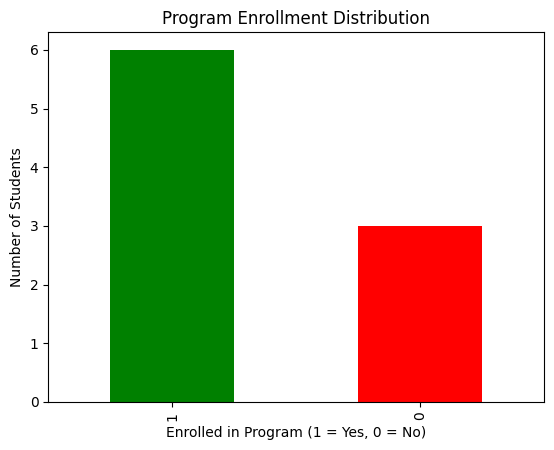

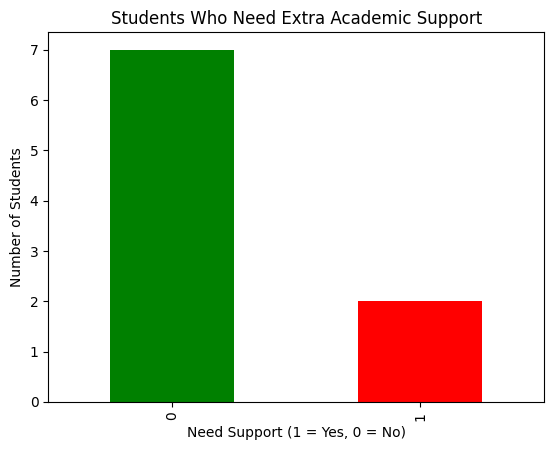

In [91]:
from matplotlib import axis
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from tabulate import tabulate

# Load Datasets (self-made)
enrollment = pd.read_csv("enrollment_data.csv")
academic = pd.read_csv("academic_records.csv")
demographic = pd.read_csv("demographic_data.csv")

# Merge All Datasets by student_id
larry = enrollment.merge(academic, on="student_id").merge(demographic, on="student_id")


# 1. Graduation outcome
larry['outcome'] = larry.apply(

    lambda row: 1 if row['average_grade'] >= 50 and row['attendance_rate'] >= 70 else 0,
    axis=1
)

# 2. Program enrollment
larry['enrolled_in_program'] = larry.apply(
lambda row: 1 if row['parental_support'] >= 3 and row['socioeconomic_status'] >= 2 else 0,
axis=1
)
# 3. Need extra academic support
larry['need_support'] = larry.apply(
    lambda row: 1 if row['average_grade'] < 60 or row['attendance_rate'] < 70 else 0,
    axis=1
)


larry = pd.get_dummies(larry, columns=['previous_school_type'], drop_first=True)

print("\n===== DATA PREVIEW =====")
print("Shape of the dataset: ",larry.shape)
print(tabulate(larry.head(10), headers='keys', tablefmt='psql'))

# MODEL 1 – Predict Graduation Success
print("\n===== MODEL 1: Predict Graduation Success =====")
feature_cols = ['average_grade', 'attendance_rate','failed_subjects']
X1 = larry.loc[:, feature_cols]
y1 = larry['outcome']

# Train-test split
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X1, y1, test_size=0.3, random_state=42
)
# Train Logistic Regression model
model1 = LogisticRegression(max_iter=1000)
model1.fit(X_train1, y_train1)

# Predict on test set
predictions1 = model1.predict(X_test1)
# Evaluate
print("Accuracy:", accuracy_score(y_test1, predictions1))
print(classification_report(y_test1, predictions1))

# MODEL 2 – Predict Program Enrollment
print("\n===== MODEL 2: Predict Program Enrollment =====")
feature_cols_program = [
    'parental_support',
    'socioeconomic_status'
]

X2 = larry.loc[:, feature_cols_program]
y2 = larry['enrolled_in_program']

# Train-test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, y2, test_size=0.3, random_state=42
)
# Train Logistic Regression model
model2 = LogisticRegression(max_iter=1000)
model2.fit(X_train2, y_train2)
# Predictions
program_predictions = model2.predict(X_test2)
# Evaluation
print("Accuracy:", accuracy_score(y_test2, program_predictions))
print(classification_report(y_test2, program_predictions))

# ================= MODEL 3 – Predict Students Needing Support =================
print("\n===== MODEL 3: Predict Need for Support =====")

# Select relevant features
feature_cols_support = [
    'attendance_rate',
    'failed_subjects',
    'average_grade'
]

X3 = larry.loc[:, feature_cols_support]
y3 = larry['need_support']
# Train-test split
X_train3, X_test3, y_train3, y_test3 = train_test_split(
    X3, y3, test_size=0.3, random_state=42
)
# Train Logistic Regression model
model3 = LogisticRegression(max_iter=1000)
model3.fit(X_train3, y_train3)
# Predictions
support_predictions = model3.predict(X_test3)
# Evaluation
print("Accuracy:", accuracy_score(y_test3, support_predictions))
print(classification_report(y_test3, support_predictions))


# ================= BAR CHARTS =================
import matplotlib.pyplot as plt

# Count values for each prediction column
graduation_counts = larry['outcome'].value_counts()
enrollment_counts = larry['enrolled_in_program'].value_counts()
support_counts = larry['need_support'].value_counts()

# Bar Chart 1: Graduation Outcome
plt.figure(figsize=(6, 5))
graduation_counts.plot(kind='bar', color=['green', 'red'])
plt.title("Graduation Outcome Distribution")
plt.xlabel("Graduation Outcome (1 = Pass, 0 = At Risk)")
plt.ylabel("Number of Students")
plt.xticks(rotation=0)
plt.show()

# Bar Chart 2: Program Enrollment
plt.figure()
enrollment_counts.plot(kind='bar', color=['green','red'])
plt.title("Program Enrollment Distribution")
plt.xlabel("Enrolled in Program (1 = Yes, 0 = No)")
plt.ylabel("Number of Students")
plt.show()

# Bar Chart 3: Need for Academic Support
plt.figure()
support_counts.plot(kind='bar', color=['green','red'])
plt.title("Students Who Need Extra Academic Support")
plt.xlabel("Need Support (1 = Yes, 0 = No)")
plt.ylabel("Number of Students")
plt.show()

In [90]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# DEFINE NUMERIC FEATURES PER MODEL
numeric_cols_model1 = ['average_grade', 'attendance_rate', 'failed_subjects']
numeric_cols_model2 = ['parental_support', 'socioeconomic_status']
numeric_cols_model3 = ['attendance_rate', 'failed_subjects', 'average_grade']

# SCALE FEATURES
scaler1 = StandardScaler()
larry[numeric_cols_model1] = scaler1.fit_transform(larry[numeric_cols_model1])

scaler2 = StandardScaler()
larry[numeric_cols_model2] = scaler2.fit_transform(larry[numeric_cols_model2])

scaler3 = StandardScaler()
larry[numeric_cols_model3] = scaler3.fit_transform(larry[numeric_cols_model3])

# TEST EACH MODEL

# Model 1 – Graduation
X1 = larry[numeric_cols_model1]
y1 = larry['outcome']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=42)
pred1 = model1.predict(X_test1)
print("\n===== Graduation Model =====")
print("Accuracy:", accuracy_score(y_test1, pred1))
print(classification_report(y_test1, pred1))

# Model 2 – Program Enrollment
X2 = larry[numeric_cols_model2]
y2 = larry['enrolled_in_program']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42)
pred2 = model2.predict(X_test2)
print("\n===== Program Enrollment Model =====")
print("Accuracy:", accuracy_score(y_test2, pred2))
print(classification_report(y_test2, pred2))

# Model 3 – Need Support
X3 = larry[numeric_cols_model3]
y3 = larry['need_support']
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.3, random_state=42)
pred3 = model3.predict(X_test3)
print("\n===== Need Support Model =====")
print("Accuracy:", accuracy_score(y_test3, pred3))
print(classification_report(y_test3, pred3))

# --------------------- NEW STUDENT PREDICTION -------------------
new_student = pd.DataFrame([{
    'student_id': 'BSCIT004',
    'enrollment_year': 2025,
    'average_grade': 80,
    'attendance_rate': 80,
    'failed_subjects': 1,
    'socioeconomic_status': 4,
    'distance_to_school': 2.5,
    'parental_support': 1
}])

# Scale numeric features per model
new_student[numeric_cols_model1] = scaler1.transform(new_student[numeric_cols_model1])
new_student[numeric_cols_model2] = scaler2.transform(new_student[numeric_cols_model2])
new_student[numeric_cols_model3] = scaler3.transform(new_student[numeric_cols_model3])

# Predictions
grad_pred = model1.predict(new_student[numeric_cols_model1])[0]
program_pred = model2.predict(new_student[numeric_cols_model2])[0]
support_pred = model3.predict(new_student[numeric_cols_model3])[0]

print("\n===== New Student Predictions =====")
print("Graduation Prediction (1=Pass, 0=At risk):", grad_pred)
print("Program Enrollment Prediction (1=Enrolled in program, 0=Not enrolled):", program_pred)
print("Need Support Prediction (1=Needs Support, 0=No Support Needed):", support_pred)
print("\n=============================================================================")



===== Graduation Model =====
Accuracy: 0.3333333333333333
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       0.00      0.00      0.00         2

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3


===== Program Enrollment Model =====
Accuracy: 0.3333333333333333
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       0.00      0.00      0.00         2

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3


===== Need Support Model =====
Accuracy: 0.3333333333333333
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      1.00      0.50       

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m